In [1]:
!pip install torch

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

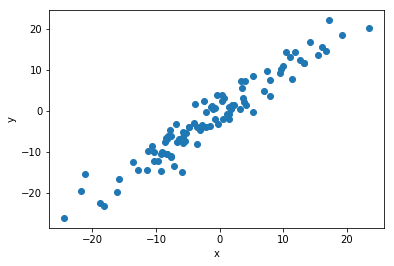

In [3]:
x = torch.randn(100,1)*10
y = x + 3*torch.randn(100,1)
plt.plot(x.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    pred = self.linear(x)
    return pred
    
    

In [5]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w,b] = model.parameters()

def get_params():
  return (w[0][0].item(), b[0].item())


In [0]:
def plot_fill(title):
  plt.tile = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1,y1, 'r')
  plt.scatter(x,y)
  plt.show()
  

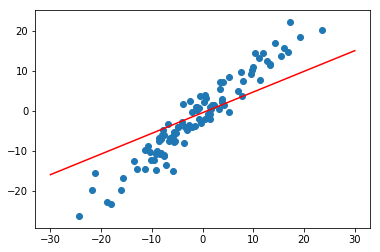

In [8]:
plot_fill('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [10]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  

epoch: 0 loss: 30.9742374420166
epoch: 1 loss: 23.533031463623047
epoch: 2 loss: 18.44768714904785
epoch: 3 loss: 14.972344398498535
epoch: 4 loss: 12.59725570678711
epoch: 5 loss: 10.974079132080078
epoch: 6 loss: 9.864749908447266
epoch: 7 loss: 9.106583595275879
epoch: 8 loss: 8.588395118713379
epoch: 9 loss: 8.234213829040527
epoch: 10 loss: 7.99211311340332
epoch: 11 loss: 7.826610565185547
epoch: 12 loss: 7.713455677032471
epoch: 13 loss: 7.636077404022217
epoch: 14 loss: 7.583150386810303
epoch: 15 loss: 7.546934604644775
epoch: 16 loss: 7.522140026092529
epoch: 17 loss: 7.505153656005859
epoch: 18 loss: 7.493504524230957
epoch: 19 loss: 7.485504627227783
epoch: 20 loss: 7.479999542236328
epoch: 21 loss: 7.476201057434082
epoch: 22 loss: 7.473570823669434
epoch: 23 loss: 7.471739768981934
epoch: 24 loss: 7.470456600189209
epoch: 25 loss: 7.46954870223999
epoch: 26 loss: 7.468898296356201
epoch: 27 loss: 7.468425750732422
epoch: 28 loss: 7.468074321746826
epoch: 29 loss: 7.467808

Text(0.5, 0, 'epoch')

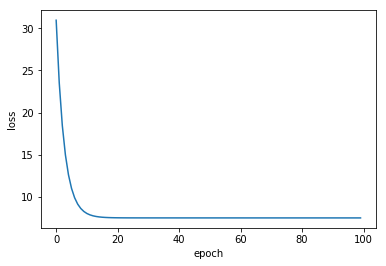

In [11]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')

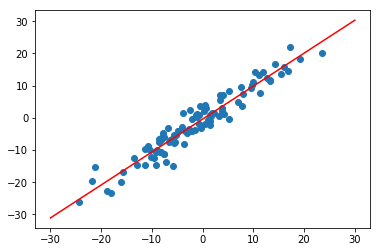

In [13]:
plot_fill('trained_model')